In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SHDataset import SHDataset
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from metrics import *

In [3]:
dataset = SHDataset(noise=False, dataset_dir='./dataset_250/')

Loading map: Wien: 100%|██████████| 4/4 [07:53<00:00, 118.44s/it]     
/home/kjw/Documents/UvA/Thesis/SyntheticHighways/ChangeDetection/SHDataset.py:90: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(self.data)


In [4]:
G1,T1,G2,T2 = dataset.read_snapshots(0)

In [5]:
bbox = (52.355, 52.365, 4.860, 4.900)
G1,T1,G2,T2 = filter_bbox_snapshots(G1,T1,G2,T2,bbox)

### Visualizing Maps + Trajectories & Changes

#### Visualizing Maps + Trajectories

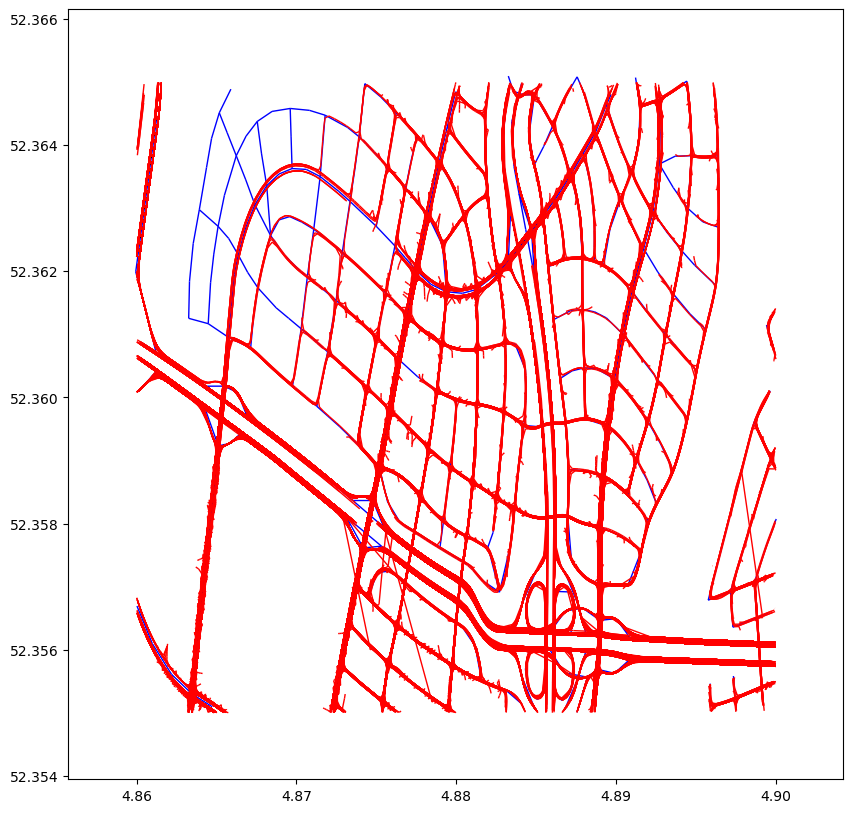

In [6]:
plot_graph(snapshot_to_nxgraph(G1,T2['T']), figsize=(10,10))

#### Visualizing Changes

In [7]:
G1_d, G12_d, G2_d, G21_d = compare_snapshots(G1,G2)

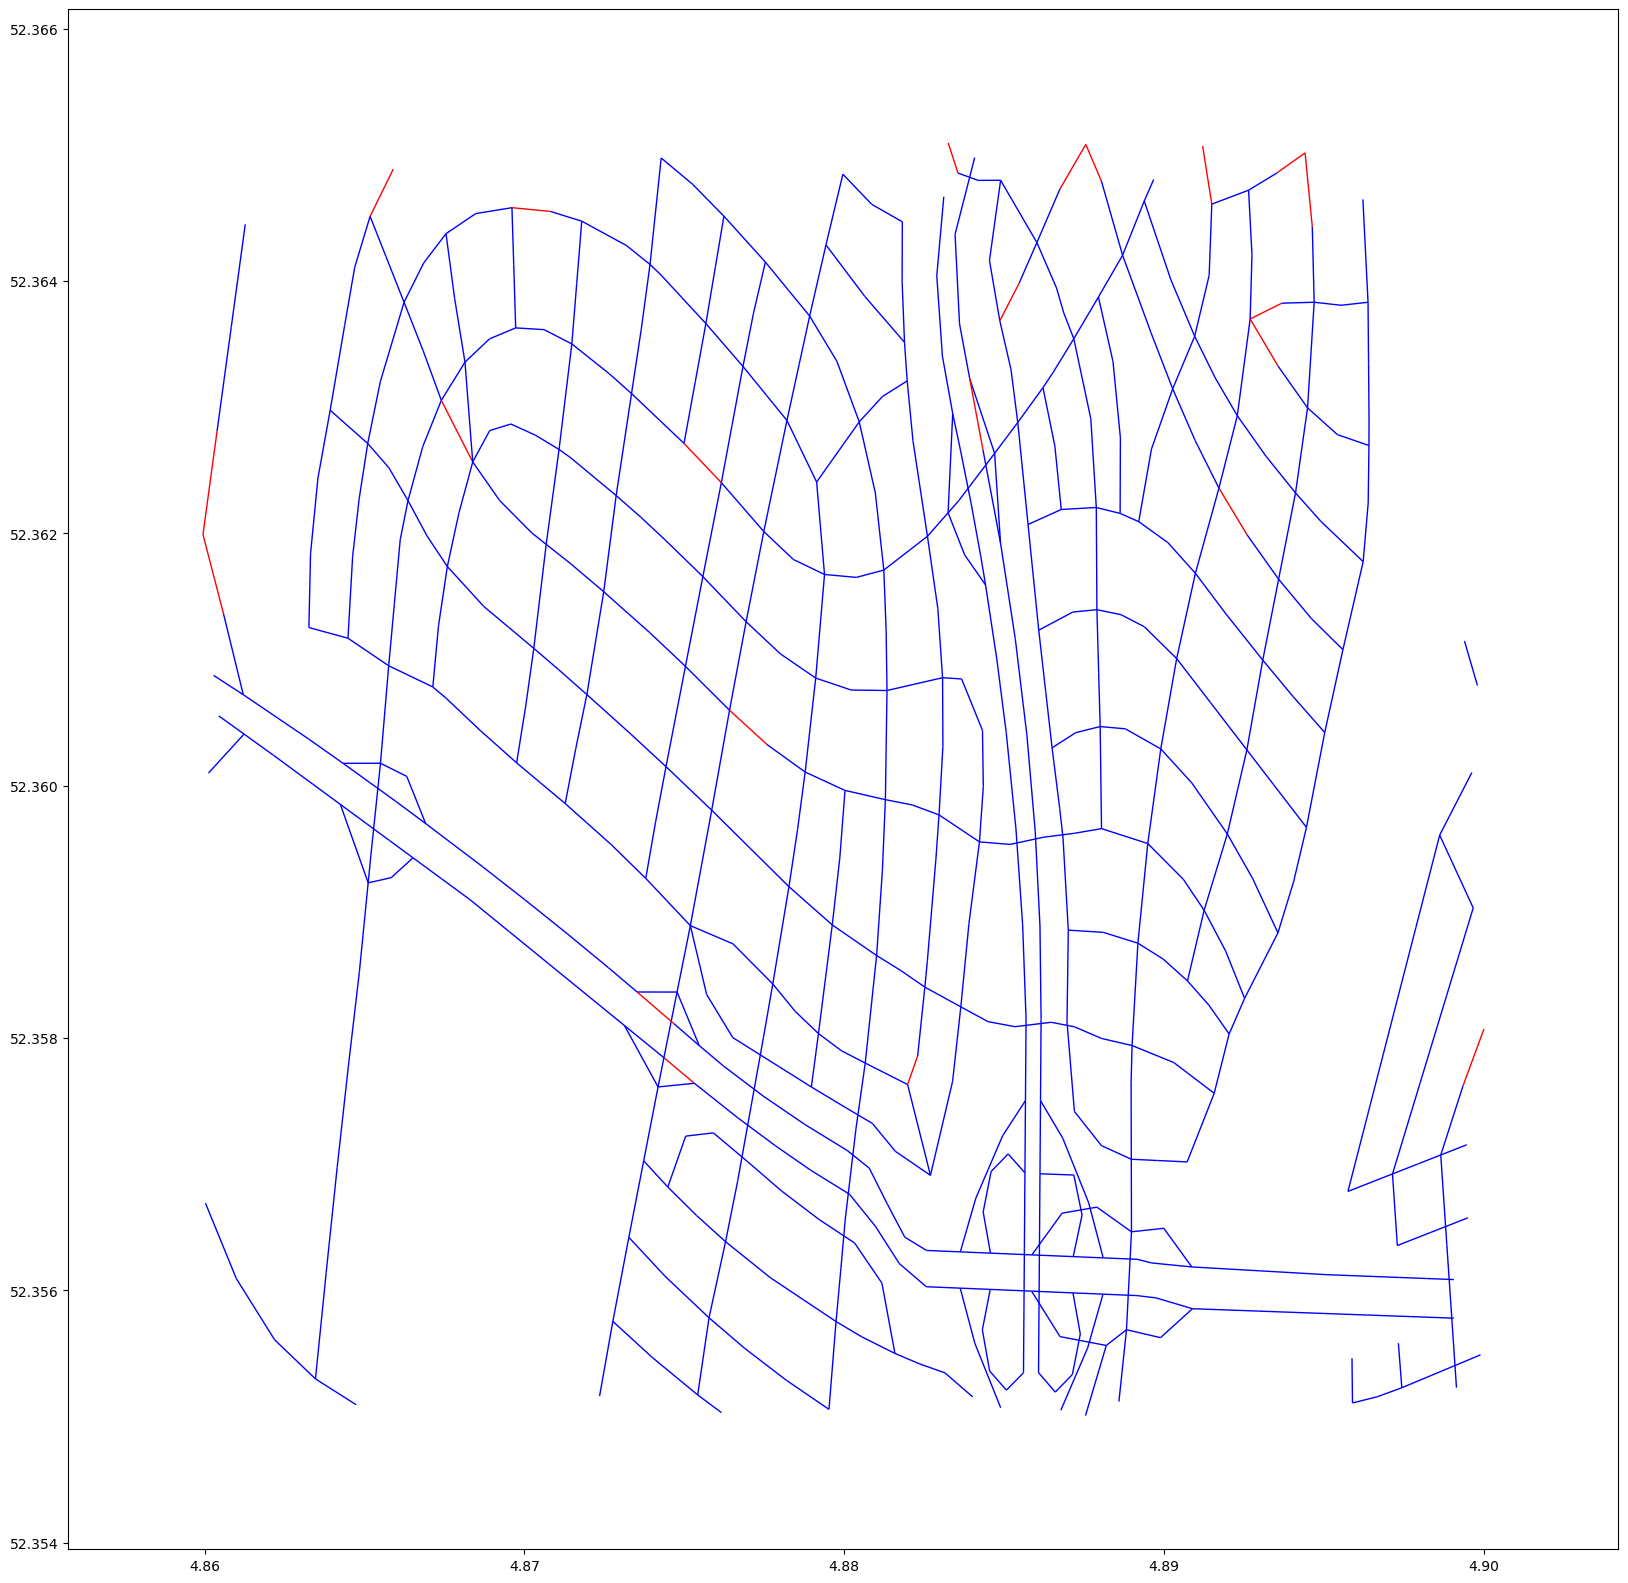

In [8]:
plot_graph(G12_d, figsize=(20,20))

### Change Detectors

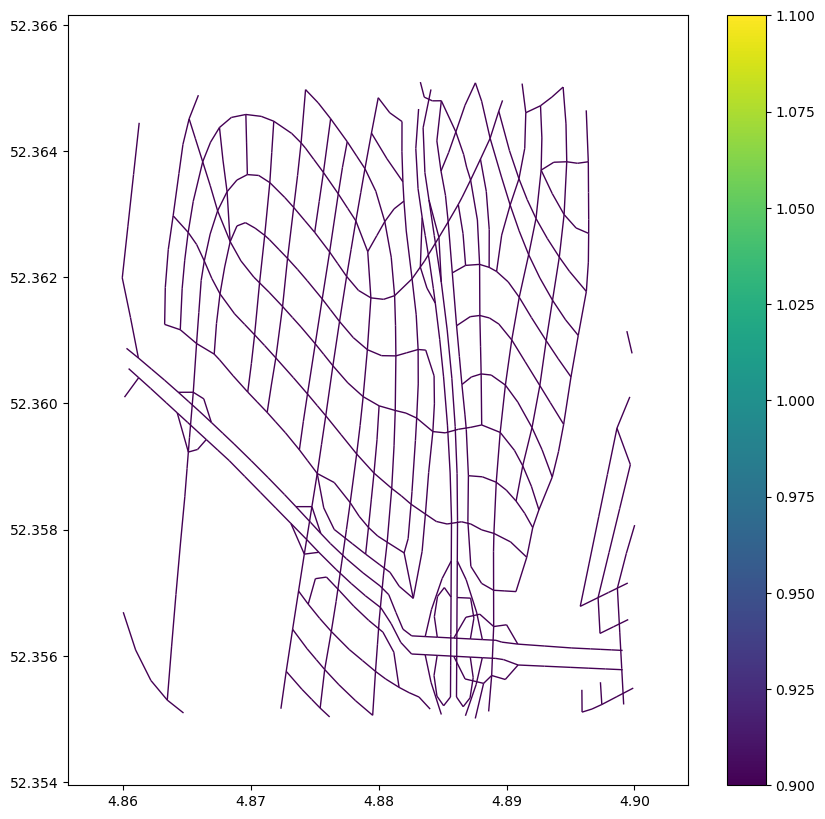

In [9]:
from models.always_true import AlwaysTrueDetector

alwaystrue_det = AlwaysTrueDetector(G1)
G2_pred_true = alwaystrue_det.forward(T2)
plot_graph(G2_pred_true, use_weights=True, figsize=(10,10))

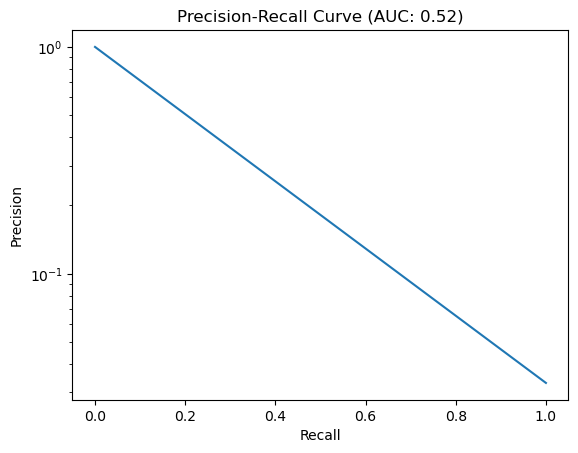

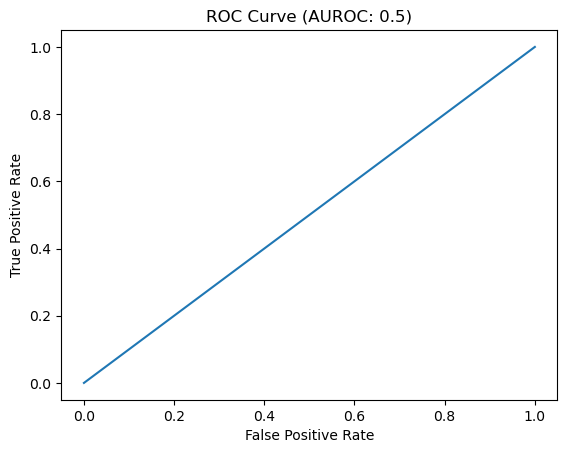

In [10]:
from metrics import *

scores_true = predicted_labels(G2_pred_true)
p_true, r_true, ts_true, pr_auc_true = PRCurve(groundtruth_labels(G1, G2), scores_true, norm=False)
tpr_true, fpr_true, auroc_true = ROCCurve(groundtruth_labels(G1, G2), scores_true)

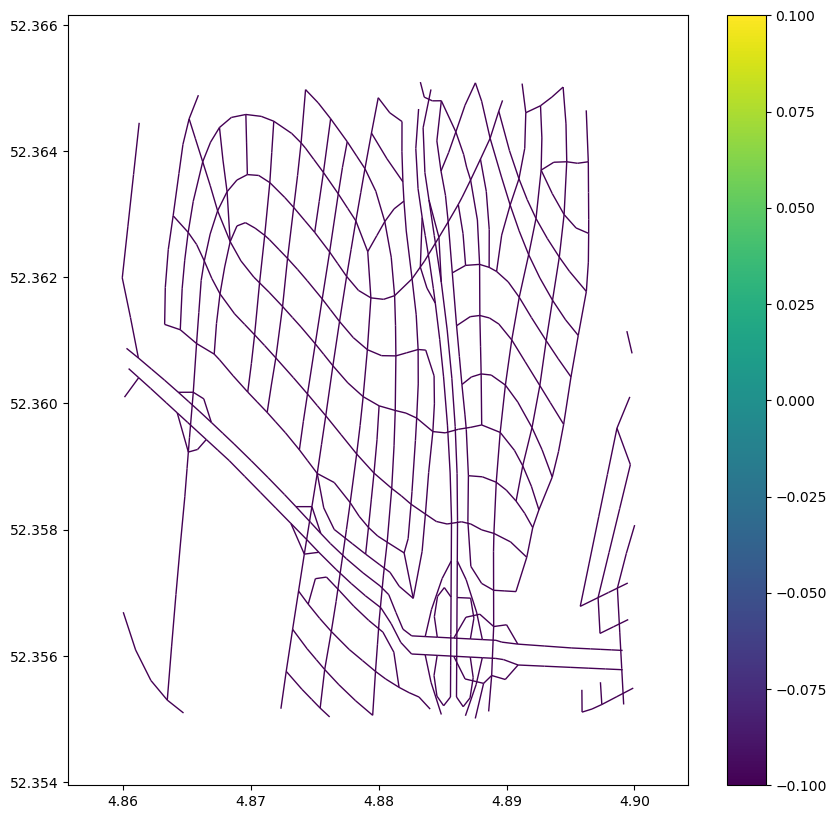

In [11]:
from models.always_false import AlwaysFalseDetector

alwaysfalse_det = AlwaysFalseDetector(G1)
G2_pred_false = alwaysfalse_det.forward(T2)
plot_graph(G2_pred_false, use_weights=True, figsize=(10,10))

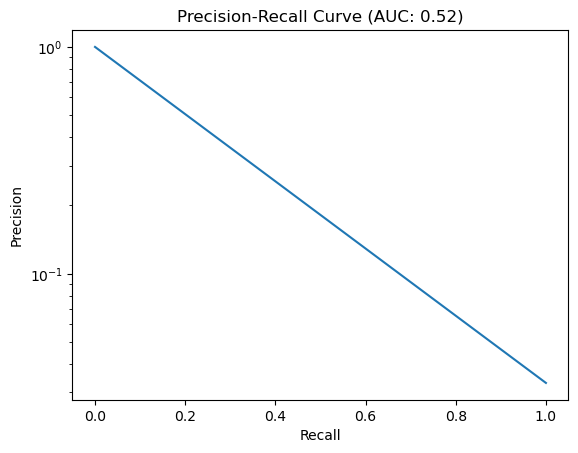

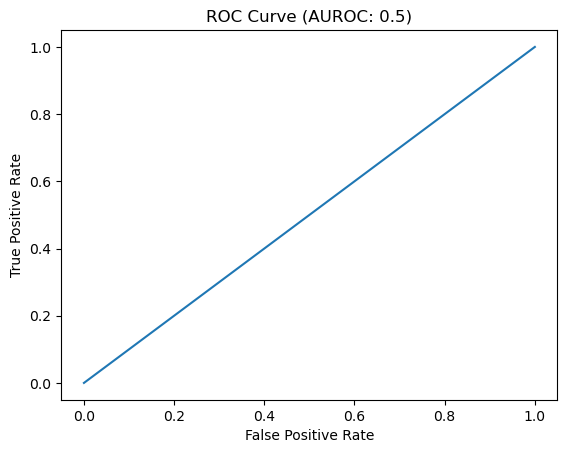

In [12]:
scores_false = predicted_labels(G2_pred_false)
p_false, r_false, ts_false, pr_auc_false = PRCurve(groundtruth_labels(G1, G2), scores_false)
tpr_false, fpr_false, auroc_false = ROCCurve(groundtruth_labels(G1, G2), scores_false)

#### Random Change Detector

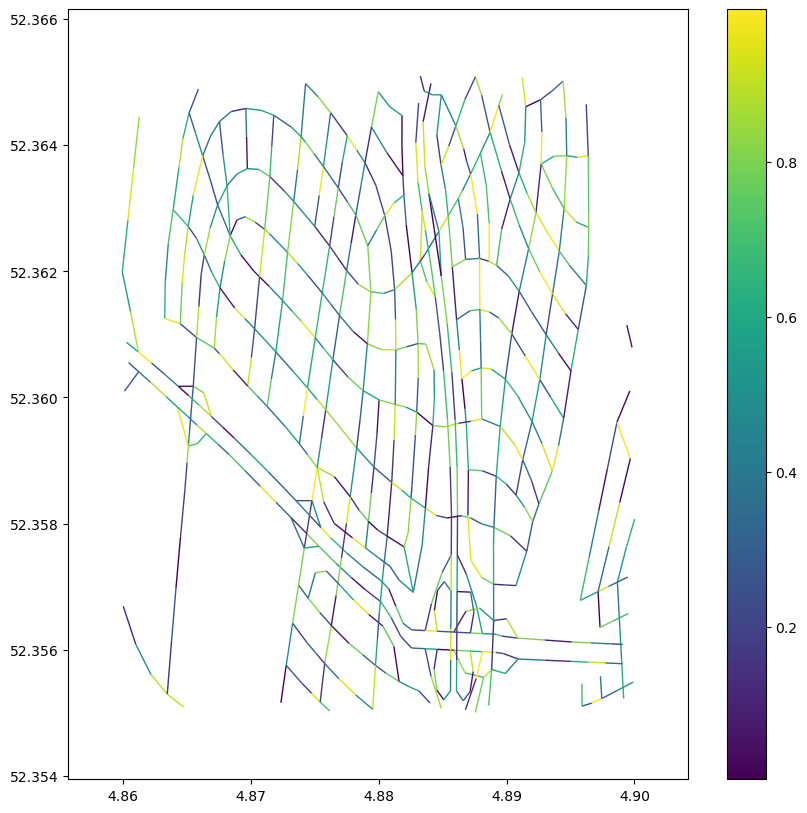

In [13]:
from models.random import RandomDetector

random_det = RandomDetector(G1)
G2_pred_rand = random_det.forward(T2)
plot_graph(G2_pred_rand, use_weights=True, figsize=(10,10))

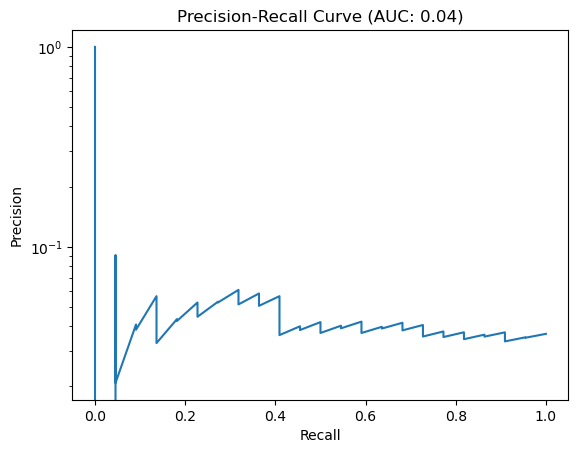

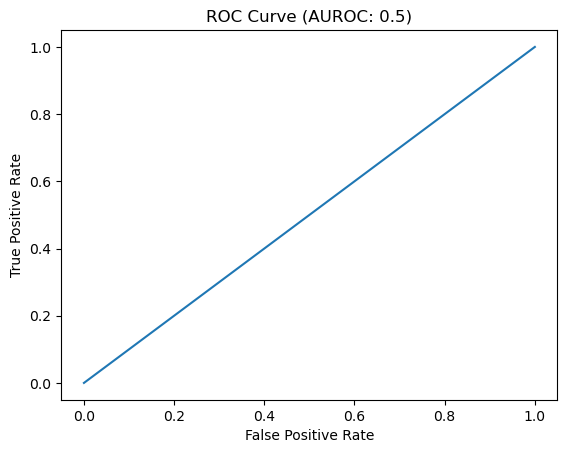

In [14]:
scores_rand = predicted_labels(G2_pred_rand)
p_rand, r_rand, ts_rand, pr_auc_rand = PRCurve(groundtruth_labels(G1, G2), scores_rand)
tpr_rand, fpr_rand, auroc_rand = ROCCurve(groundtruth_labels(G1, G2), scores_false)

In [15]:
# edges, edge_weights = zip(*nx.get_edge_attributes(G2_pred, 'weight').items())

# w = ((t := (edge_weights - np.min(edge_weights)))/t.max() +1e-7)
# #w[w==0] = np.nan
# #w = np.exp(w)
# #w = (t := w - w.min())/t.max()
# w = w.tolist()

# class cm_(plt.cm.viridis.__class__):
#     def __call__(self, v):
#         if v == 0:
#             return (1, 0, 0, 1)
#         return super().__call__(1 - v)

# cm = cm_(plt.cm.viridis.colors)

# node_lats = nx.get_node_attributes(G2_pred, 'lat')
# node_lons = nx.get_node_attributes(G2_pred, 'lon')
# node_pos = {node: (node_lons[node], node_lats[node]) for node in nodes}
# nx.draw_networkx_edges(G2_pred, node_pos, width=1.0, edge_color=w, edge_cmap=cm, ax=plt.subplots(figsize=(30,30))[1])

#### Rule-based Change Detector

In [16]:
from models.rulebased import RulebasedDetector

rule_det = RulebasedDetector(G1)
G2_pred_rb = rule_det.forward(T2['T'])

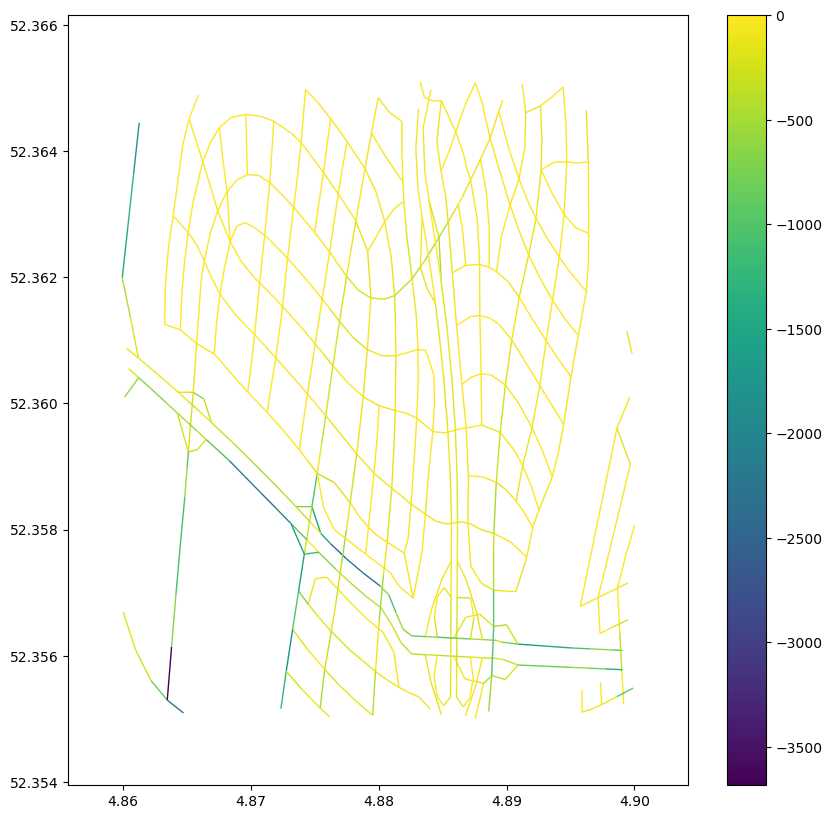

In [17]:
plot_graph(G2_pred_rb, use_weights=True, figsize=(10,10))

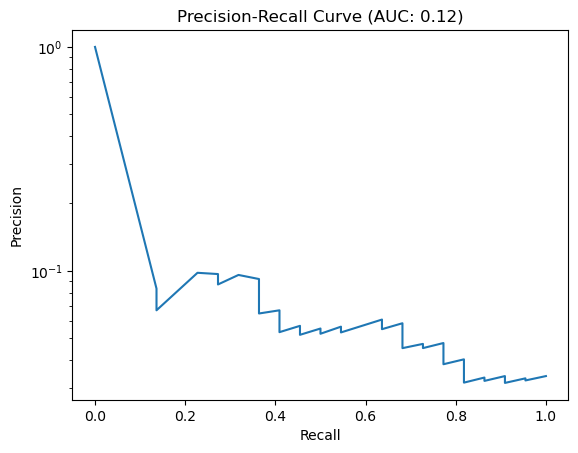

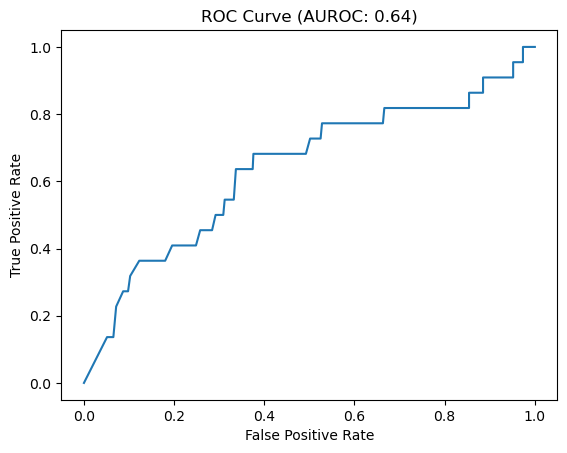

In [20]:
scores_rb = predicted_labels(G2_pred_rb)
p_rb, r_rb, ts_rb, pr_auc_rb = PRCurve(groundtruth_labels(G1, G2), scores_rb, log_scale=True)
tpr_rb, fpr_rb, auroc_rb = ROCCurve(groundtruth_labels(G1, G2), scores_rb)

### HMM Based Change Detector

In [49]:
no_matches_hmm = hmm_det.no_matches

In [29]:
import random
T_sample = random.sample(T2['T'], k=500)

In [61]:
from models.hmm import HMMChangeDetector

hmm_det = HMMChangeDetector(G1, use_latlon=False, obs_noise=50)

[(7331, 8642), (8642, 68), (68, 8642), (8642, 7331), (7331, 6699), (6699, 16134), (6699, 16134), (16134, 14883), (16134, 14883), (14883, 9424), (14883, 9424), (9424, 23885), (9424, 23885), (23885, 27707), (23885, 27707), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (27707, 17012), (17012, 14035), (17012, 14035), (17012, 14035), (17012, 14035)]


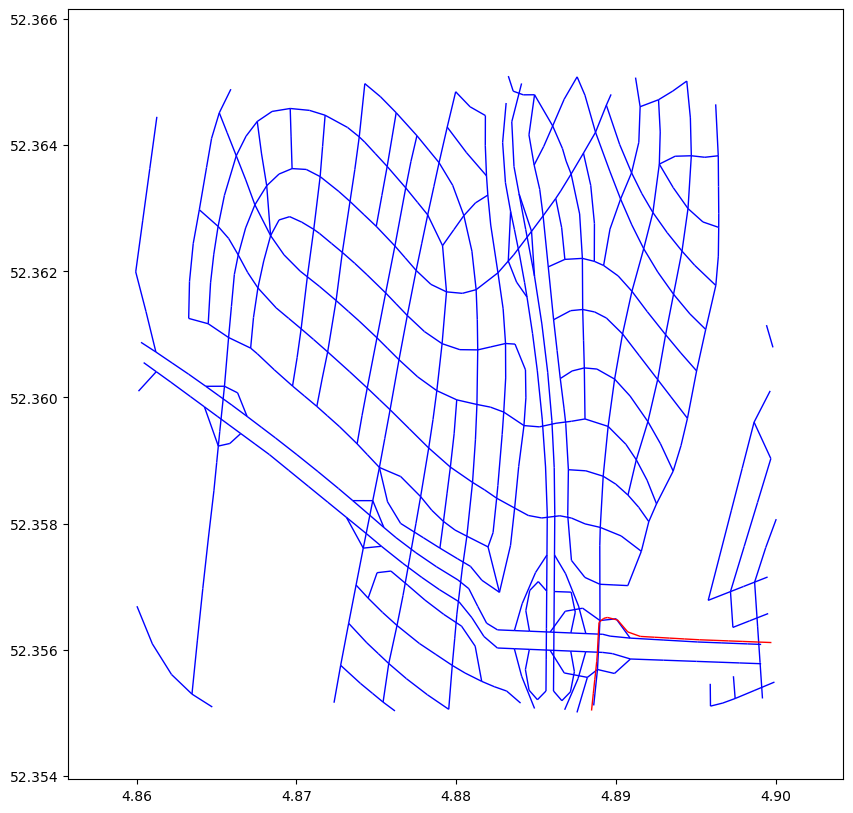

In [62]:
idx=0
path = hmm_det.map_match_trajectory(no_matches_hmm[idx])
print(path)
plot_graph(snapshot_to_nxgraph(G1, [no_matches_hmm[idx]]), figsize=(10,10))

[(26776, 17911), (17911, 19751), (19751, 10683), (10683, 6477), (6477, 27756), (27756, 27669), (27756, 27669), (27669, 26413), (26413, 9416), (26413, 9416), (9416, 11781), (11781, 18863), (11781, 18863), (18863, 8001), (18863, 8001), (18863, 8001), (18863, 8001), (18863, 8001), (8001, 24658), (8001, 24658), (8001, 24658), (8001, 24658), (8001, 24658), (24658, 5305), (24658, 5305), (5305, 29991), (5305, 29991), (5305, 29991), (29991, 6152), (29991, 6152), (29991, 6152), (29991, 6152), (6152, 8229), (6152, 8229), (8229, 11302), (8229, 11302), (8229, 11302), (11302, 31123), (11302, 31123), (11302, 31123), (31123, 26775), (31123, 26775), (31123, 26775), (31123, 26775), (31123, 26775), (31123, 26775), (31123, 26775), (26775, 25980), (26775, 25980), (25980, 7391), (25980, 7391), (7391, 13768), (7391, 13768), (7391, 13768), (7391, 13768), (7391, 13768), (7391, 13768)]


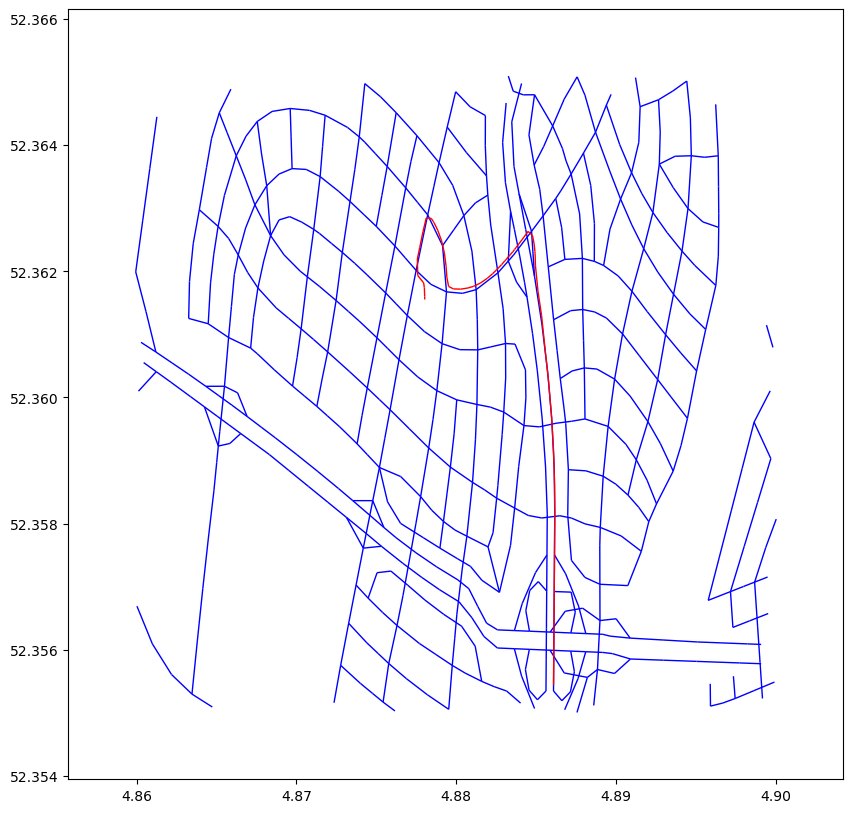

In [58]:
idx=1
path = hmm_det.map_match_trajectory(T_sample[idx])
print(path)
plot_graph(snapshot_to_nxgraph(G1, [T_sample[idx]]), figsize=(10,10))

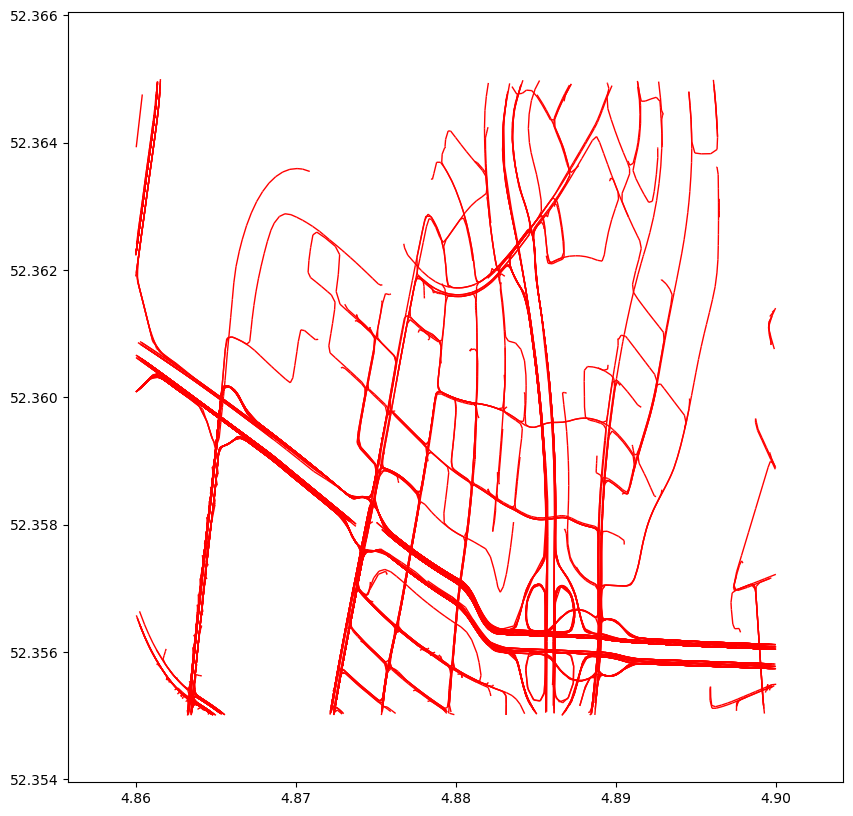

In [35]:
plot_graph(traj_to_nxgraph(T_sample), figsize=(10,10))

In [30]:
from models.hmm import HMMChangeDetector

hmm_det = HMMChangeDetector(G1, use_latlon=False)
G2_pred_hmm = hmm_det.forward(T_sample)

Map matching trajectory: 499/500: : 500it [07:25,  1.12it/s]

No matches for 135/500 trajectories


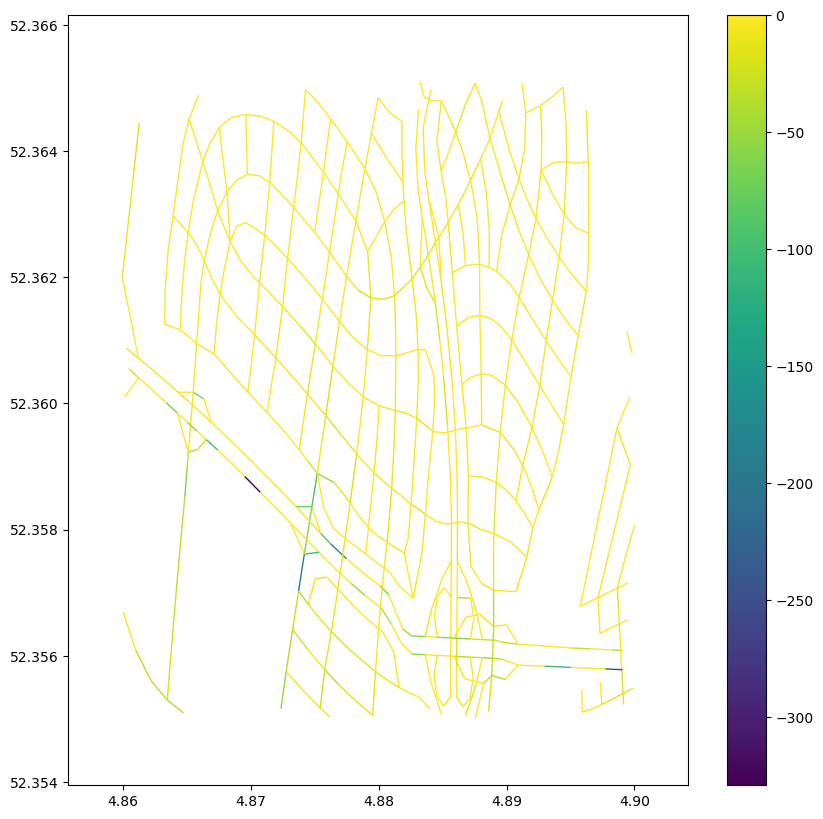

In [31]:
plot_graph(G2_pred_hmm, use_weights=True, figsize=(10,10))

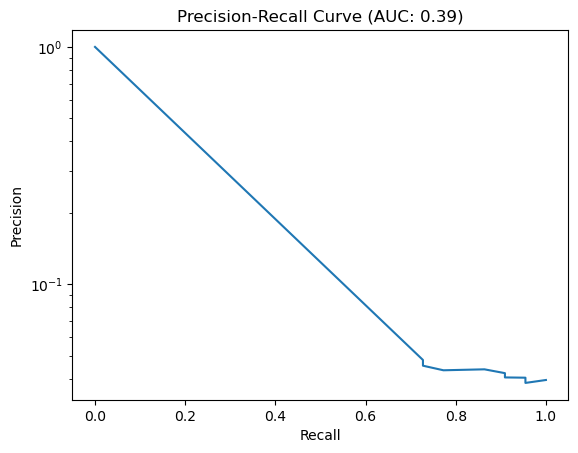

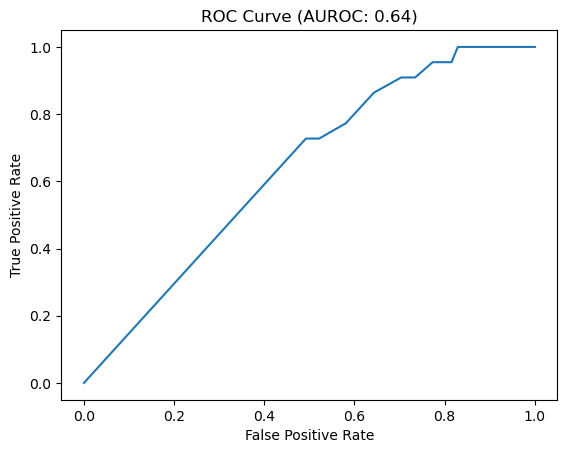

In [32]:
scores_hmm = predicted_labels(G2_pred_hmm)
p_hmm, r_hmm, ts_hmm, pr_auc_hmm = PRCurve(groundtruth_labels(G1, G2), scores_hmm)
tpr_hmm, fpr_hmm, auroc_hmm = ROCCurve(groundtruth_labels(G1, G2), scores_hmm)

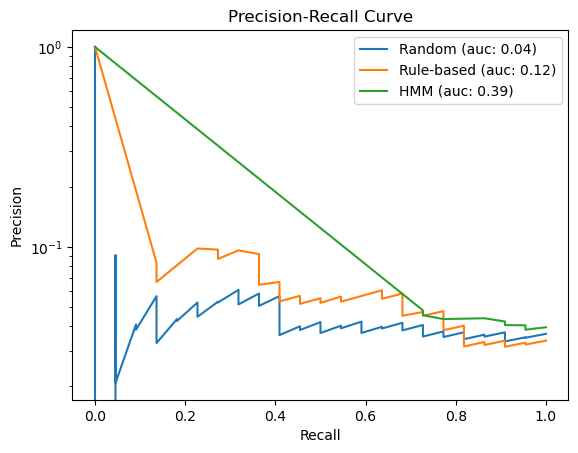

In [33]:
PRCombine(ps=[p_rand, p_rb, p_hmm], rs=[r_rand, r_rb, r_hmm], aucs=[pr_auc_rand, pr_auc_rb, pr_auc_hmm],
          labels=['Random', 'Rule-based', 'HMM'])

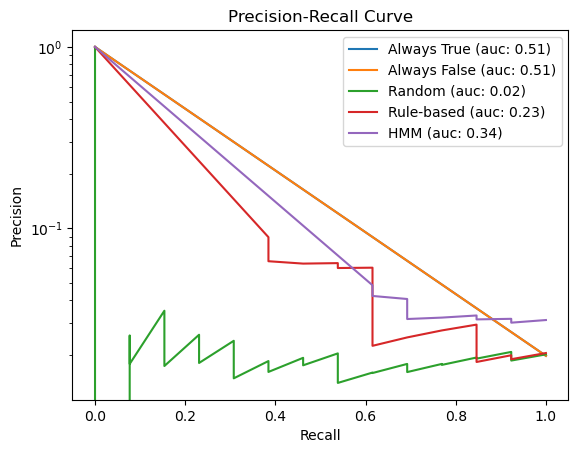

In [23]:
PRCombine(ps=[p_true, p_false, p_rand, p_rb, p_hmm], rs=[r_true, r_false, r_rand, r_rb, r_hmm],
          aucs=[pr_auc_true, pr_auc_false, pr_auc_rand, pr_auc_rb, pr_auc_hmm], 
          labels=['Always True', 'Always False', 'Random', 'Rule-based', 'HMM'])

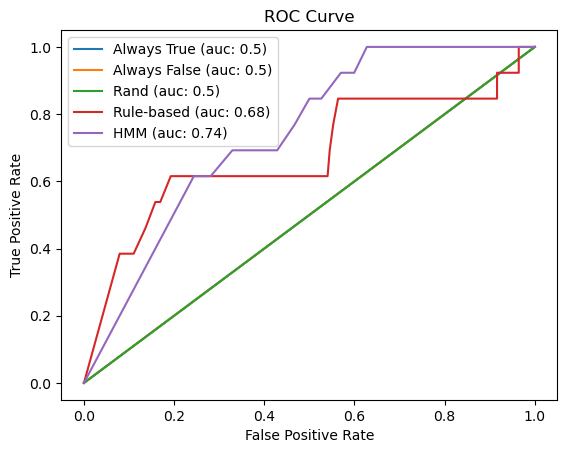

In [24]:
ROCCombine([fpr_true, fpr_false, fpr_rand, fpr_rb, fpr_hmm], 
           [tpr_true, tpr_false, tpr_rand, tpr_rb, tpr_hmm], 
           [auroc_true, auroc_false, auroc_rand, auroc_rb, auroc_hmm], 
           ['Always True', 'Always False', 'Rand', 'Rule-based', 'HMM'])

In [28]:
def evaluate_predictions(G2_pred, targets):
    num_edges = len([edge for edge in G2_pred.edges])
    
    edge_weights = nx.get_edge_attributes(G2_pred, 'weight')
    
    # Get number of roads with no matches
    nomatch_edges = [edge for edge, weight in edge_weights.items() if weight == 0]
    num_nomatch_roads = len(nomatch_edges)
    
    # Get number of roads that are actually removed
    removed_edges = [edge for edge, weight in targets.items() if weight == 1]
    num_removed_roads = len(removed_edges)
    
    print(f'# of roads with no matches: {num_nomatch_roads}/{num_edges} ({round((num_nomatch_roads/num_edges)*100,2)}%)')
    print(f'# of roads actually removed: {num_removed_roads}/{num_edges} ({round((num_removed_roads/num_edges)*100,2)}%)')
    
    # Get number of removed roads that were matched with trajectories
    removed_edges_weights = [edge_weights[edge] for edge in removed_edges]
    num_removed_edges_w_weights = len([weight for weight in removed_edges_weights if weight != 0])
    print(f'# of removed roads with non-zero weight: {num_removed_edges_w_weights}/{num_edges} ({round((num_removed_edges_w_weights/num_edges)*100,2)}%)')
    
    # Get average weight of removed roads
    avg_removed_road_weight = np.mean(removed_edges_weights)
    print(f'Average edge weight of removed segments: {avg_removed_road_weight}')
    
    # Get average weight of non removed roads
    nonremoved_edges_weights = [weight for edge, weight in edge_weights.items() if edge not in removed_edges]
    avg_nonremoved_road_weight = np.mean(nonremoved_edges_weights)
    print(f'Average edge weight of remaining segments: {avg_nonremoved_road_weight}')
    
    # Get number of non removed roads that weren't matched
    nonremoved_nomatch_edges = [weight for edge, weight in edge_weights.items() if edge not in removed_edges and weight == 0]
    num_nonremoved_nomatch_edges = len(nonremoved_nomatch_edges)
    print(f"# of non removed roads that weren't matched: {num_nonremoved_nomatch_edges}/{num_edges} ({round((num_nonremoved_nomatch_edges/num_edges)*100,2)}%)")
    
    
    
evaluate_predictions(G2_pred_hmm, groundtruth_labels(G1,G2))

# of roads with no matches: 165/657 (25.11%)
# of roads actually removed: 13/657 (1.98%)
# of removed roads with non-zero weight: 0/657 (0.0%)
Average edge weight of removed segments: 0.0
Average edge weight of remaining segments: -22.869565217391305
# of non removed roads that weren't matched: 152/657 (23.14%)


In [29]:
evaluate_predictions(G2_pred_rb, groundtruth_labels(G1,G2))

# of roads with no matches: 56/657 (8.52%)
# of roads actually removed: 13/657 (1.98%)
# of removed roads with non-zero weight: 8/657 (1.22%)
Average edge weight of removed segments: -23.46153846153846
Average edge weight of remaining segments: -82.08850931677019
# of non removed roads that weren't matched: 51/657 (7.76%)


In [ ]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image

def save_maps(G1, G2, T2, G2_pred, figsize=(10,10)):
    if not os.path.exists('./images'):
        os.mkdir('./images')
    
    G1_d, G12_d, G2_d, G21_d = compare_snapshots(G1,G2)
    plot_graph(G12_d, show_img=False, figsize=figsize)
    plt.savefig('./images/G2_changes.png')
    
    plot_graph(G2_pred, show_img=False, use_weights=True, figsize=(figsize[0]+2, figsize[1]))
    plt.savefig('./images/G2_pred.png')
    
    plot_graph(snapshot_to_nxgraph(G1,T2['T']), show_img=False, figsize=figsize)
    plt.savefig('./images/G1T2.png')
    

save_maps(G1, G2, T2, G2_pred_rb)

In [ ]:
@interact
def compare_maps(file=os.listdir('./images/')):
    display(Image('./images/'+file))
